### This project explores what determines a good salary- whether years of experience has some impact on the salary of an individual

For analysis the Python libraries used are:
- Pandas (Data Manipulation)
- Numpy (Mathematical Calculations)
- Matplotlib and Seaborn (Data Visualisation)
- Sklearn (Machine Learning Operations)

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Salary_Data.csv')

### Preview of the Dataset

This a simple and small dataset with only numerical variables

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
df.shape

(30, 2)

### Visualising the Data

<Axes: title={'center': 'Salary Distribution'}, xlabel='Salary', ylabel='Count'>

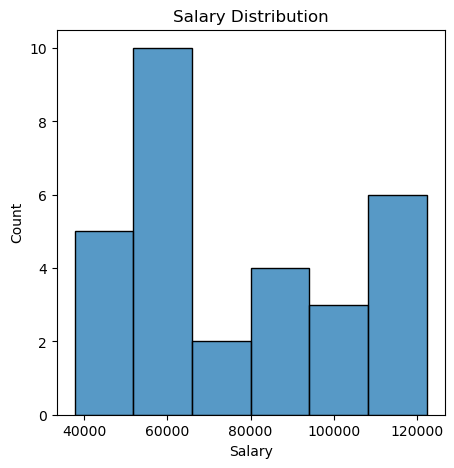

In [36]:
plt.figure(figsize=(5,5))
plt.title('Salary Distribution')
sns.histplot(df['Salary'])

The Salary data is slightly positively skewed

#### Relationship between Salary and Years of Experience

Visualising with a scatterplot using Matplotlib

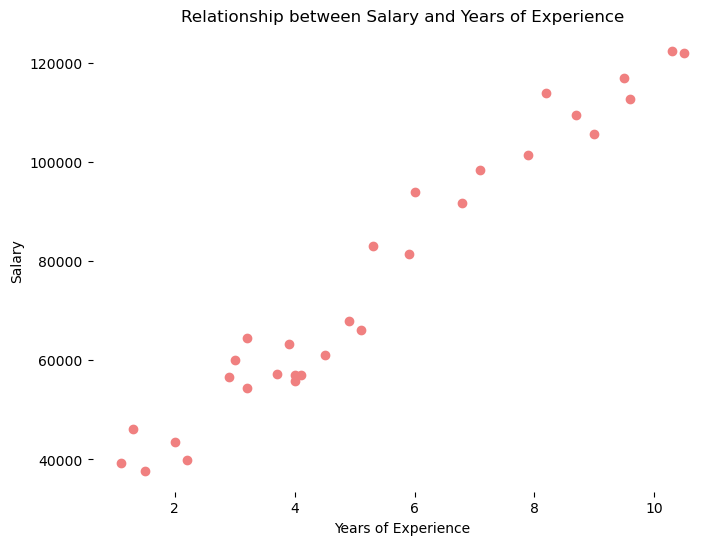

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['YearsExperience'],df['Salary'], color ='lightcoral')
plt.title('Relationship between Salary and Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

Visualising with a scatterplot and a fitted Regression Line using Seaborn

C:\Users\ADMIN\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

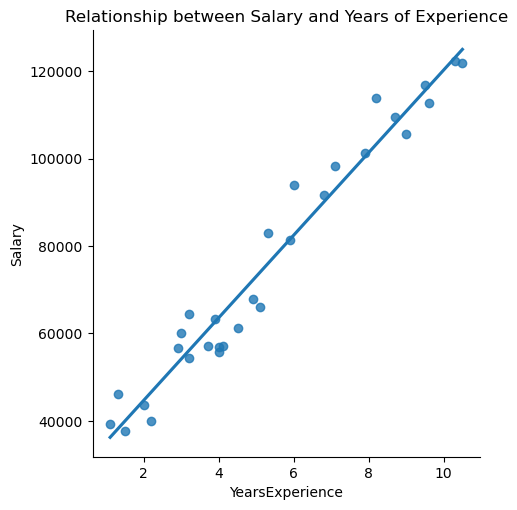

In [26]:
plt.figure(figsize=(10,6))
sns.lmplot(x='YearsExperience',y='Salary',data=df,fit_reg=True, ci=None).set(title='Relationship between Salary and Years of Experience')

It is evident that Salary does have a strong linear relationship with Years of Experience

### Regression Analysis

#### Splitting Data

The Independant Variable in our analysis is YearsExperience, while the Dependant variable will be Salary.
Through this analysis we shall try to predict the Salary of an individual

In [42]:
X = df.iloc[:,:1] 
y = df.iloc[:,1:]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Training the Simple Linear Regression model

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [45]:
print(regressor.intercept_)

[26780.09915063]


In [46]:
print(regressor.coef_)

[[9312.57512673]]


#### Predicting Results

We shall now predict the value of y (dependant variable - Salary) using the trained model results. regressor.predict will be used

In [47]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

#### Plotting and comparing the training and test results

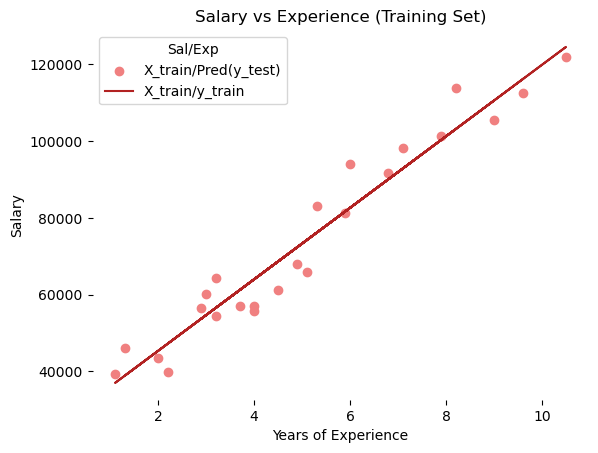

In [48]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

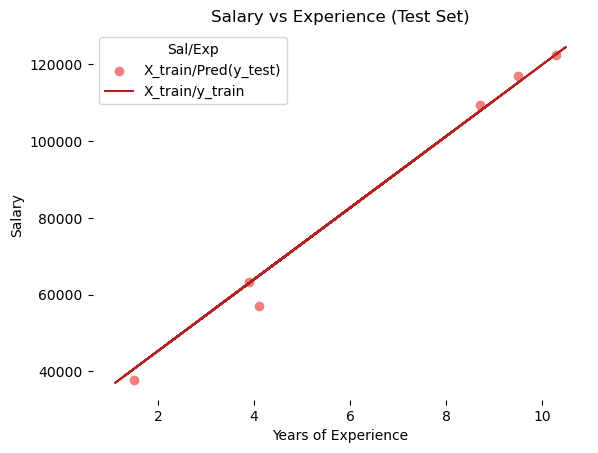

In [49]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()